In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
from stratmanager import StrategyManager

In [3]:
import sklearn.mixture as mix
from ta.momentum import RSIIndicator
import matplotlib.pyplot as plt

In [4]:
#Extract Data
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "BTC-USD"
strat_mgr = StrategyManager(symbol, start_date, end_date)
df = strat_mgr.df.copy()
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets
Date,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307


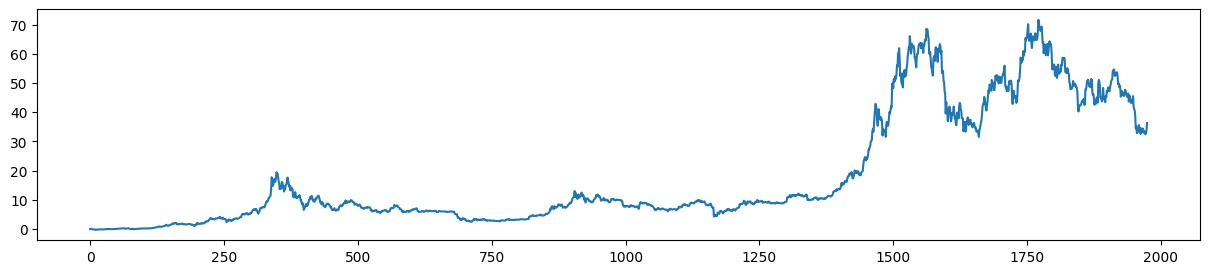

In [5]:
#Benchmark Returns Profile
fig = plt.figure(figsize = (15,3))
plt.plot(df['Bench_C_Rets'].values)
plt.show()

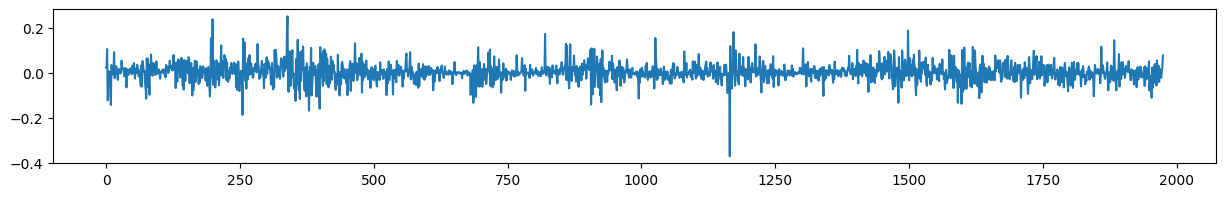

In [6]:
fig = plt.figure(figsize = (15,2))
plt.plot(df['Returns'].values)
plt.show()

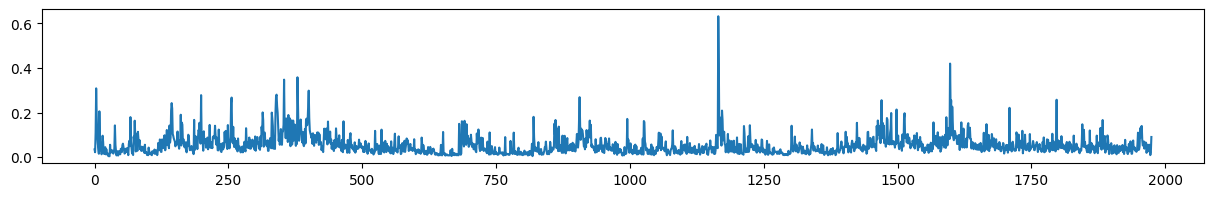

In [7]:
#Benchmark Range Profile
fig = plt.figure(figsize = (15,2))
plt.plot(df['Range'].values)
plt.show()

### Feature Engineering - Feature Expansion

In [8]:
# Create a copy
df_fe = df.copy()

#### Indicators

In [24]:
rsi = RSIIndicator(close = df_fe['Close'],window = 14).rsi()
df_fe['RSI'] = rsi
df_fe['RSI_Ret'] = df_fe['RSI'] / df_fe['RSI'].shift(1)


In [25]:
#Add moving Average
df_fe['MA_12'] = df_fe['Close'].rolling(window = 12).mean()
df_fe['MA_21'] = df_fe['Close'].rolling(window = 21).mean()

In [33]:
#DAy of Week
df_fe["DOW"] = df_fe.index.dayofweek

In [34]:
#Rolling Cumulative Returns
df_fe['Roll_Rets'] = df_fe['Returns'].rolling(window = 30).sum()

In [35]:
#Rolling Cumulative Range
df_fe['Avg_Range'] = df_fe['Range'].rolling(window = 30).mean()

### Time Intervals

In [36]:
# Add Time Intervals
t_steps = [1,2]
t_features = ['Returns','Range','RSI_Ret']
for ts in t_steps:
    for tf in t_features:
        df_fe[f'{tf}_T{ts}'] = df_fe[tf].shift(ts)

In [37]:
df_fe

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999,NaN,NaN,...,NaN,1,NaN,NaN,0.023464,0.034803,NaN,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122,NaN,NaN,...,NaN,2,NaN,NaN,0.021620,0.022005,NaN,0.023464,0.034803,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098,NaN,NaN,...,NaN,3,NaN,NaN,0.106233,0.110130,NaN,0.021620,0.022005,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307,NaN,NaN,...,NaN,4,NaN,NaN,-0.122410,0.308302,NaN,0.106233,0.110130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,-0.009984,0.055632,33.189608,38.165993,0.977232,...,30545.702009,3,-0.239867,0.057147,-0.003144,0.026300,0.993166,0.019130,0.034313,1.065192
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,-0.021856,0.036020,32.436595,36.240181,0.949541,...,30192.685454,4,-0.291202,0.057119,-0.009984,0.055632,0.977232,-0.003144,0.026300,0.993166
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,0.006544,0.009117,32.894788,37.238957,1.027560,...,29874.254371,5,-0.298233,0.056286,-0.021856,0.036020,0.949541,-0.009984,0.055632,0.977232


### Feature Engineering - Feature Scaling

In [40]:
df_fs = df_fe.copy()
df_fs[['Open','High','Low','Volume']] = df_fs[['Open','High','Low','Volume']].pct_change()
df_fs.head(5)

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,1021.750000,NaN,0.023464,0.034803,0.023314,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.023015,0.012304,0.024980,1043.839966,-0.166604,0.021620,0.022005,0.045999,NaN,NaN,...,NaN,1,NaN,NaN,0.023464,0.034803,NaN,NaN,NaN,NaN
2017-01-04,0.022318,0.110471,0.022318,1154.729980,0.862881,0.106233,0.110130,0.159122,NaN,NaN,...,NaN,2,NaN,NaN,0.021620,0.022005,NaN,0.023464,0.034803,NaN
2017-01-05,0.107555,0.027324,-0.128287,1013.380005,0.479069,-0.122410,0.308302,0.018098,NaN,NaN,...,NaN,3,NaN,NaN,0.106233,0.110130,NaN,0.021620,0.022005,NaN
2017-01-06,-0.123183,-0.121140,-0.029078,902.200989,-0.310316,-0.109711,0.184249,-0.092307,NaN,NaN,...,NaN,4,NaN,NaN,-0.122410,0.308302,NaN,0.106233,0.110130,NaN


In [41]:
df_fs.dropna(inplace = True)

In [42]:
dfobj = df_fs.isin([np.inf,-np.inf])
count = np.isinf(dfobj).values.sum()
count

0

In [43]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1946 entries, 2017-01-31 to 2022-05-30
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1946 non-null   float64
 1   High          1946 non-null   float64
 2   Low           1946 non-null   float64
 3   Close         1946 non-null   float64
 4   Volume        1946 non-null   float64
 5   Returns       1946 non-null   float64
 6   Range         1946 non-null   float64
 7   Bench_C_Rets  1946 non-null   float64
 8   RSI           1946 non-null   float64
 9   RSI_Ret       1946 non-null   float64
 10  MA_12         1946 non-null   float64
 11  MA_21         1946 non-null   float64
 12  DOW           1946 non-null   int32  
 13  Roll_Rets     1946 non-null   float64
 14  Avg_Range     1946 non-null   float64
 15  Returns_T1    1946 non-null   float64
 16  Range_T1      1946 non-null   float64
 17  RSI_Ret_T1    1946 non-null   float64
 18  Returns_T2

In [44]:
df_fs.describe()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.002640,0.002469,0.002669,17570.438400,0.034158,0.002681,0.054619,18.356974,53.353131,1.005225,...,17422.614146,3.000000,0.080488,0.054496,0.002642,0.054574,1.005097,0.002629,0.054565,1.005045
std,0.041294,0.036165,0.041674,17584.150825,0.285609,0.041337,0.045462,19.598884,14.536341,0.104682,...,17508.120701,2.000514,0.252338,0.024850,0.041303,0.045469,0.104531,0.041300,0.045477,0.104513
min,-0.365924,-0.263712,-0.364062,937.520020,-0.869188,-0.371695,0.004622,-0.044698,9.920239,0.453659,...,885.613522,0.000000,-0.844981,0.015818,-0.371695,0.003887,0.453659,-0.371695,0.003887,0.453659
25%,-0.015749,-0.012419,-0.012327,6306.479858,-0.122297,-0.015891,0.026312,5.905869,43.028897,0.954042,...,6417.694284,1.000000,-0.079972,0.036458,-0.015891,0.026289,0.954042,-0.015891,0.026289,0.954042
50%,0.002232,-0.000083,0.003320,9207.506836,-0.007011,0.002284,0.042897,8.902196,52.563634,1.006141,...,9214.705659,3.000000,0.052905,0.049081,0.002280,0.042881,1.005988,0.002250,0.042881,1.005823
75%,0.020769,0.016445,0.019541,31611.601562,0.145432,0.021156,0.067144,33.734586,63.296791,1.047744,...,32933.907064,5.000000,0.248645,0.067115,0.021105,0.067098,1.047471,0.021047,0.067098,1.047124
max,0.250461,0.245708,0.247892,67566.828125,5.439003,0.252472,0.631387,71.644966,94.302215,1.926078,...,63016.876488,6.000000,1.154731,0.138628,0.252472,0.631387,1.926078,0.252472,0.631387,1.926078


In [46]:
#Save DataFrame
df_fs.to_csv('BTC-USD.csv')